# Clustering Loan (defaulting) Statuses
## UCI credit card dataset

This dataset uses a different terminology: _default.payment.next.month_ indicates if next month the bank customer will not be able to pay the loan, hence he/she _defaults_

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb

pd.set_option('display.max_columns', 100)


# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Clustering Data
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
credit = pd.read_csv("data/UCI_Credit_Card.csv")
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(credit)

Your selected dataframe has 25 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [6]:
features = credit.drop(columns='default.payment.next.month')

sc = StandardScaler()
features_df = sc.fit_transform(features)

# Normalizing the Data 
normalized_df = normalize(features_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

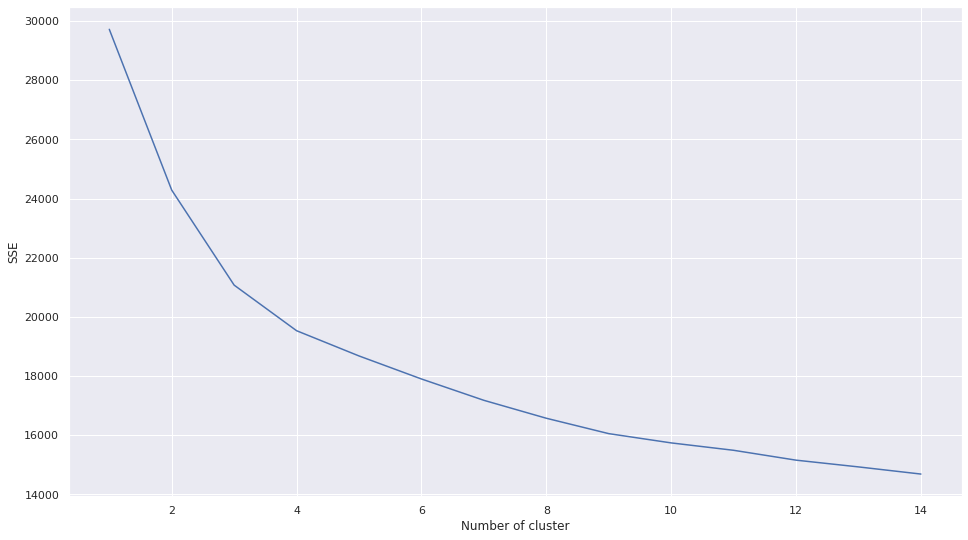

In [7]:
plt.rcParams["figure.figsize"] = (16,9)

sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(normalized_df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [8]:
kmean= KMeans(3)
kmean.fit(features_df)
labels=kmean.labels_

In [9]:
labels=pd.DataFrame(labels)
labels.columns = ['Cluster']

In [10]:
credit = pd.DataFrame(credit)
credit = pd.DataFrame(credit)
credit_a = credit.values.tolist()
credit_a = pd.DataFrame(credit_a)
credit_a.columns = credit.columns
clusters=pd.concat([credit_a, labels], axis=1)

/home/fedebotu/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


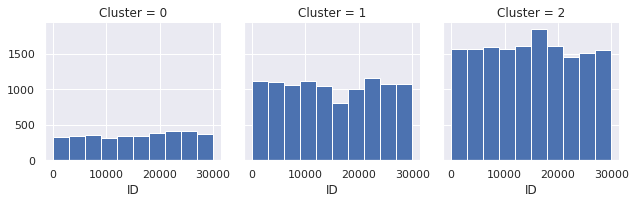

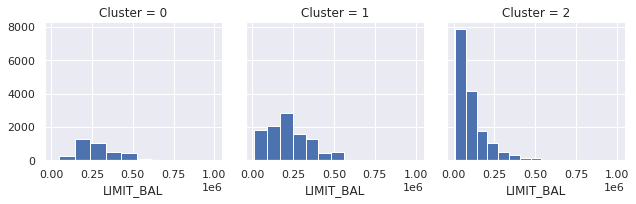

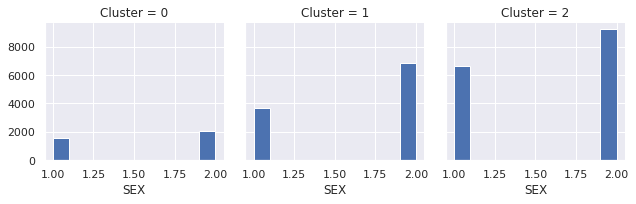

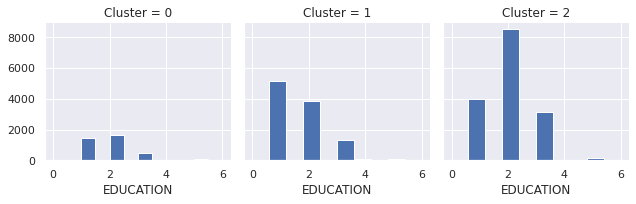

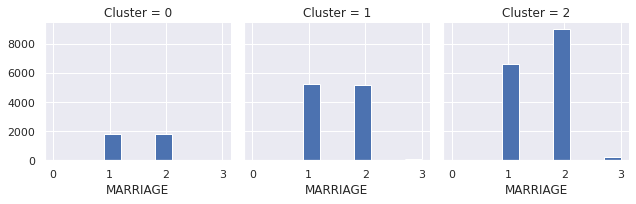

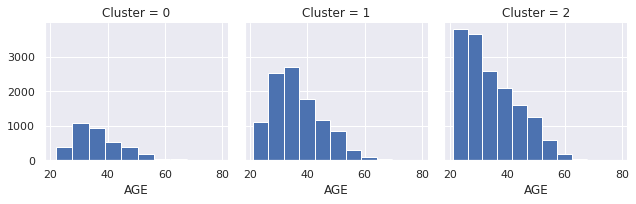

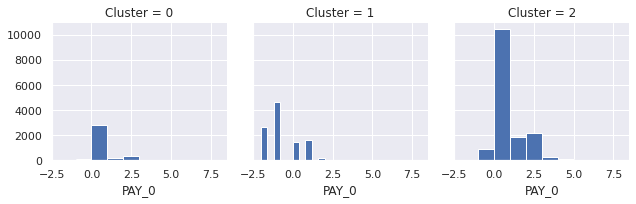

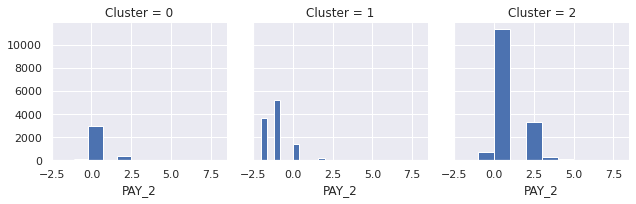

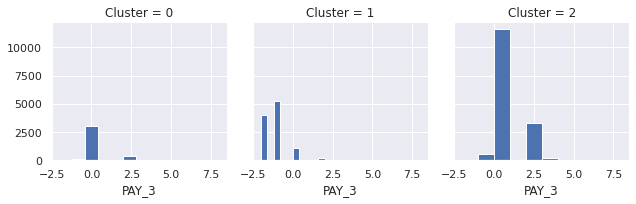

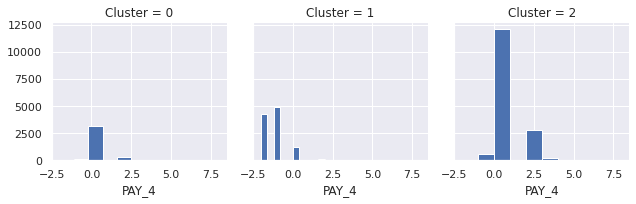

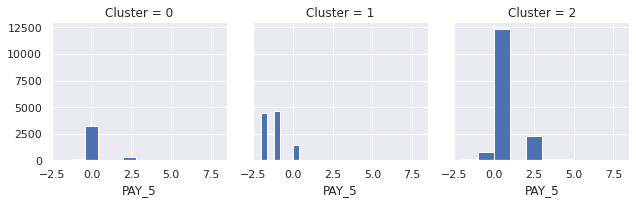

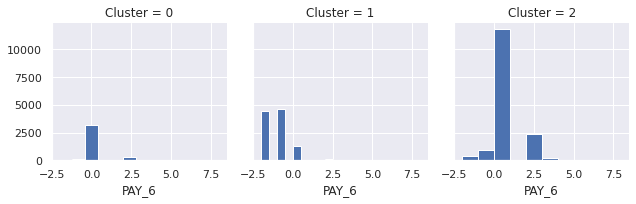

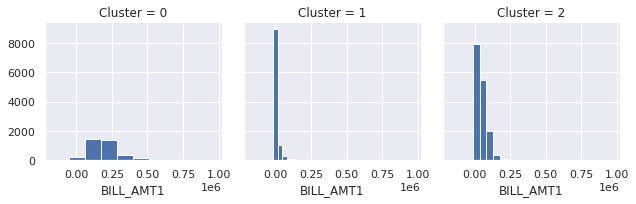

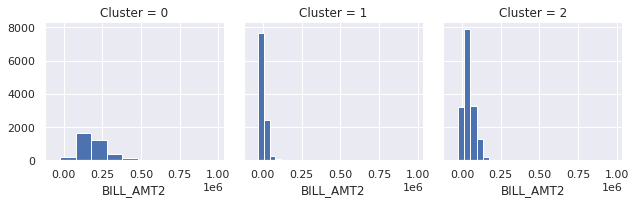

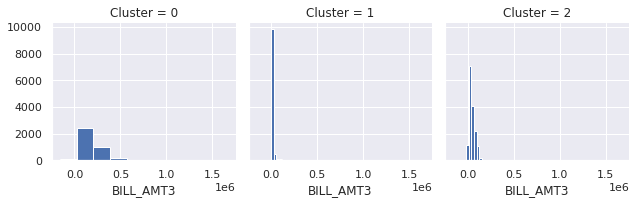

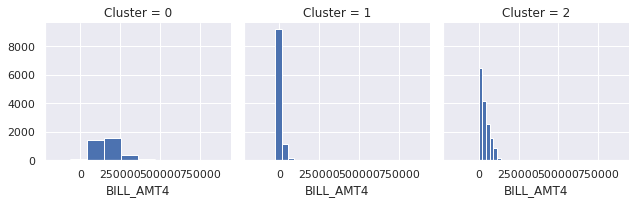

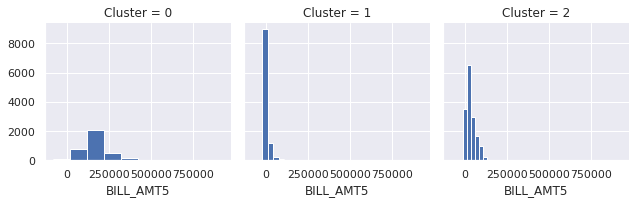

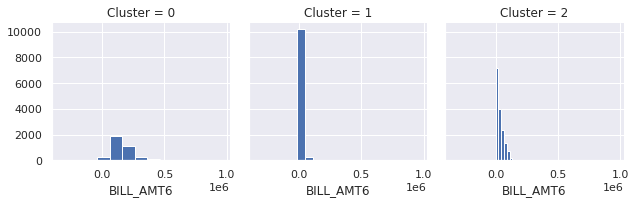

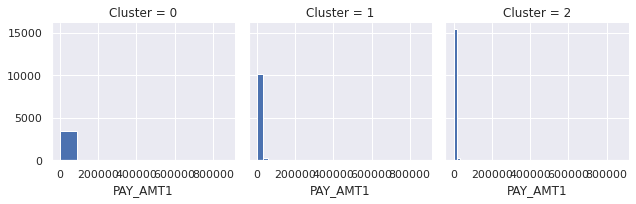

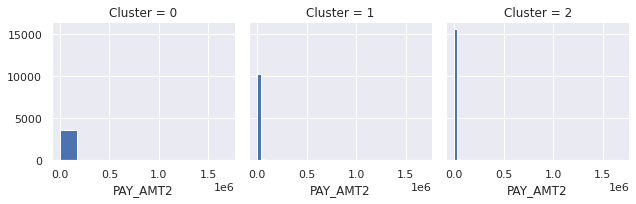

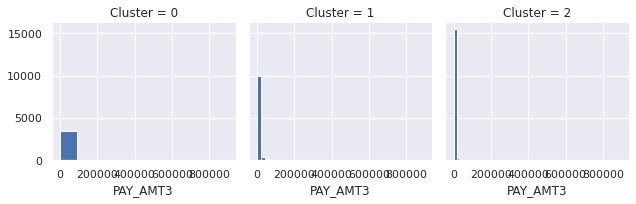

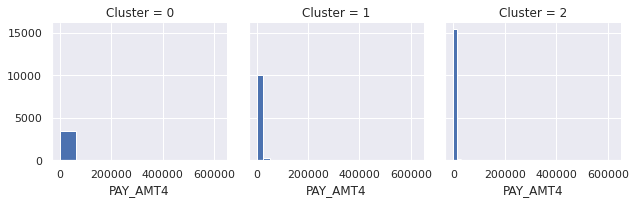

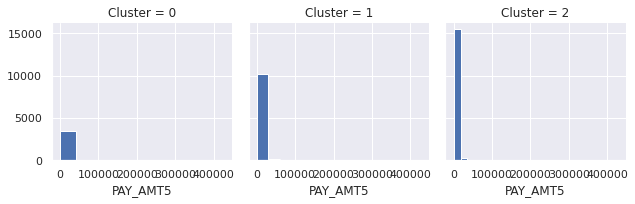

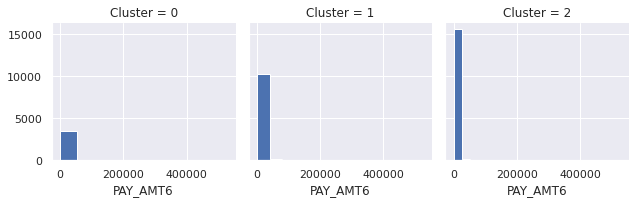

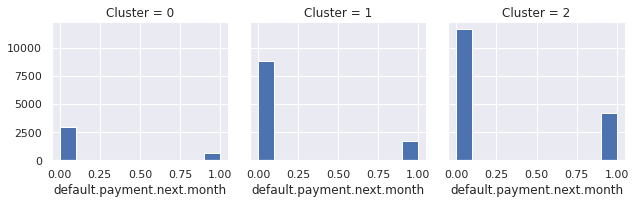

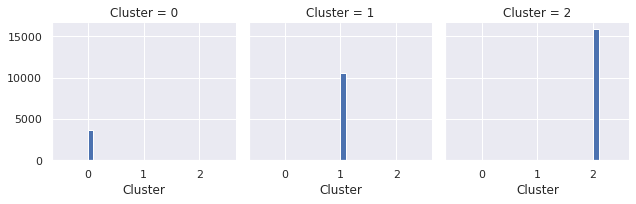

In [11]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='Cluster')
    grid.map(plt.hist, c)

In [12]:
clusters['Cluster'].value_counts()

2    15845
1    10539
0     3616
Name: Cluster, dtype: int64

In [13]:
clusters.groupby('Cluster').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,
0,15554.746128,282908.650442,1.571350,1.804204,1.503872,37.026272,0.251106,0.218473,0.193584,0.149336,0.127765,0.133850,199472.261892,196637.195520,191824.465985,179564.182522,167696.601770,160765.293971,16409.321903,17538.643529,15225.841261,13237.110066,12921.040929,13488.780973,0.188053
1,14931.461144,220371.002941,1.647595,1.674163,1.503179,36.420343,-0.764399,-1.146693,-1.223551,-1.265111,-1.271942,-1.271088,10148.766676,7778.547395,6751.645033,6130.153051,6331.920676,6527.020970,4861.470633,5438.800930,5046.080273,4896.766391,4829.825790,5526.340734,0.164532
2,14919.934932,105966.677185,1.581950,1.983339,1.595204,34.512086,0.419501,0.459577,0.454970,0.389587,0.312843,0.263743,44711.289113,43064.313348,40744.827264,36855.708552,33841.527611,32567.828021,3744.794446,3590.763459,3062.995456,2859.570527,2925.693342,3120.703061,0.266456


In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['Principal component 1', 'Principal component 2'])
principalDf.head(2)

,Principal component 1,Principal component 2
0,-0.240602,-0.288374
1,0.084647,-0.540194


In [15]:
finalDf = pd.concat([principalDf, labels], axis = 1)
finalDf.head()

,Principal component 1,Principal component 2,Cluster
0,-0.240602,-0.288374,1
1,0.084647,-0.540194,2
2,-0.090498,-0.529054,2
3,0.107541,-0.197183,2
4,-0.133159,0.049187,2


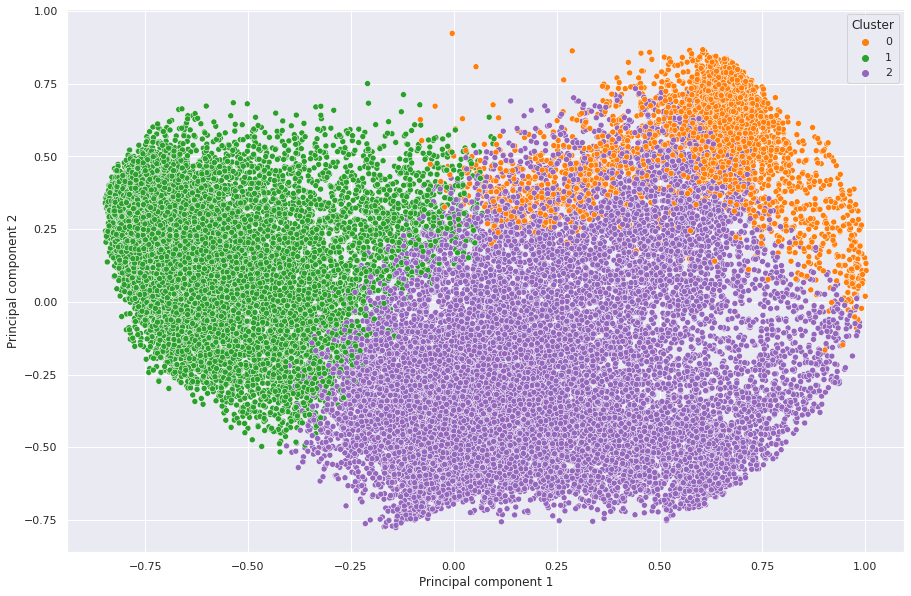

In [24]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="Principal component 1", y="Principal component 2", hue="Cluster", data=finalDf,palette=['tab:orange','tab:green','tab:purple'])
plt.savefig('images/pca_results_uci.jpg', bbox_inches='tight')
plt.show()

In [17]:
cluster_proportion = clusters[['default.payment.next.month', 'Cluster']]

In [18]:
cluster_proportion

,default.payment.next.month,Cluster
0,1.0,1
1,1.0,2
2,0.0,2
3,0.0,2
4,0.0,2
...,...,...
29995,0.0,0
29996,0.0,1
29997,1.0,2
29998,1.0,2


In [19]:
cluster_0 = cluster_proportion['Cluster'] == 0
cluster_1 = cluster_proportion['Cluster'] == 1
cluster_2 = cluster_proportion['Cluster'] == 2

In [20]:
cluster_0 = cluster_proportion[cluster_0]
cluster_1 = cluster_proportion[cluster_1]
cluster_2 = cluster_proportion[cluster_2]

In [21]:
print('The Loan Status Proportion of the Cluster 0 (Unit: %)')
(cluster_0.groupby('default.payment.next.month').count()/len(cluster_0) * 100).round(4)

The Loan Status Proportion of the Cluster 0 (Unit: %)


,Cluster
default.payment.next.month,
0.0,81.1947
1.0,18.8053


In [22]:
print('The Loan Status Proportion of the Cluster 1 (Unit: %)')
(cluster_1.groupby('default.payment.next.month').count()/len(cluster_1) * 100).round(4)

The Loan Status Proportion of the Cluster 1 (Unit: %)


,Cluster
default.payment.next.month,
0.0,83.5468
1.0,16.4532


In [23]:
print('The Loan Status Proportion of the Cluster 2 (Unit: %)')
(cluster_2.groupby('default.payment.next.month').count()/len(cluster_2) * 100).round(4)

The Loan Status Proportion of the Cluster 2 (Unit: %)


,Cluster
default.payment.next.month,
0.0,73.3544
1.0,26.6456
